<div style="text-align: center;">
    <h1> <font style="bold"> Analisis Predictivo Avanzado </font></h1>
    <h2><font style="bold">Trabajo práctico 2</font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Abril</li>
        <li>Arbues Lucas</li>
        <li>Alfie Agustin</li>
        </ul>
    </h4>
</div>

Las plataformas de streaming ofrecen una gran cantidad de películas, lo que a menudo resulta en una elección difícil para los usuarios. Esta "Parálisis por Análisis" puede afectar negativamente la experiencia del usuario, disminuyendo el compromiso con la plataforma y aumentando las tasas de cancelación de suscripciones.

# Justificacion de Negocio

El sistema de recomendación de películas está diseñado para **mejorar la experiencia del usuario** mediante la facilitación de la elección de contenidos. El desafío radica en desarrollar un mecanismo que no solo se alinee con las preferencias individuales de los usuarios sino que también fomente el descubrimiento de nuevas películas que puedan ser de su interés, con el fin de aumentar su satisfacción y fidelidad a la plataforma.

<p align="center">
  <img src="imagenes/movierecommendation.png" alt="Movie Recommendation System" width="400"/>
</p>

Este Notebook se enfocará en el desarrollo de un sistema de recomendación de películas mediante el uso de técnicas avanzadas de machine learning. Se utilizarán algoritmos de filtrado colaborativo, metodos basados en memoria y metodos colaborativos para analizar los patrones de visualización, las calificaciones y los metadatos de las películas, con el objetivo de proporcionar recomendaciones precisas y personalizadas.

Se incluirá en el proyecto una fase de despliegue (deploy) que permitirá a los usuarios interactuar con el sistema de recomendación en un entorno operativo. Mediante una interfaz sencilla, los usuarios podrán ingresar su ID y el título de una película que les haya gustado para recibir recomendaciones personalizadas. Este enfoque asegura la transición del modelo desde el desarrollo hasta su aplicación práctica, donde su efectividad puede ser evaluada en términos de mejora en la experiencia del usuario.

Este Notebook documentará el proceso completo, desde la preparación de los datos hasta el despliegue operativo del sistema, sirviendo como una guía detallada para la implementación del sistema de recomendación y la evaluación de su rendimiento en un escenario real.

# Preparacion de la Informacion

## Imports

In [936]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import ast
from ast import literal_eval
import geopandas as gpd
import seaborn as sns


## Carga de Bases de Datos

In [937]:
movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_63694/3221149849.py:1: DtypeWarning:

Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.



## Exploracion de Datos

In [938]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'adult', 'budget',
       'revenue', 'runtime', 'status', 'tagline', 'video',
       'belongs_to_collection', 'homepage', 'imdb_id', 'original_title',
       'poster_path', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

### Columnas

* **adult:** Indica si la pelicula es X-Rated o Adult.
* **belongs_to_collection:** Un diccionario que da informacion de la saga a la que la pelicula pertenece.
* **budget:** Presupuesto de la pelicula en dolares. 
* **genres:** Una lista en forma de texto de diccionarios que enumeran todos los géneros asociados con la película.
* **homepage:** La página oficial de la película.
* **id:** El ID de la película.
* **imdb_id:** El ID de IMDB de la película.
* **original_language:** El idioma en el que la película fue originalmente filmada.
* **original_title:** El título original de la película.
* **overview:** Una breve descripción de la película.
* **popularity:** La puntuación de popularidad asignada por TMDB.
* **poster_path:** La URL de la imagen del póster.
* **production_companies:** Una lista en forma de texto de las compañías de producción involucradas en la realización de la película.
* **production_countries:** Una lista en forma de texto de los países donde la película fue rodada/producida.
* **release_date:** Fecha de lanzamiento teatral de la película.
* **revenue:** Los ingresos totales de la película en dólares.
* **runtime:** La duración de la película en minutos.
* **spoken_languages:** Una lista en forma de texto de los idiomas hablados en la película.
* **status:** El estado de la película (Estrenada, Por estrenar, Anunciada, etc.)
* **tagline:** El lema publicitario de la película.
* **title:** El título oficial de la película.
* **video:** Indica si hay un video presente de la película en TMDB.
* **vote_average:** La calificación promedio de la película.
* **vote_count:** El número de votos de usuarios, según lo contado por TMDB.

In [939]:
movies.shape

(55332, 24)

In [940]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55332 entries, 0 to 55331
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  55326 non-null  object 
 1   overview               54341 non-null  object 
 2   release_date           55230 non-null  object 
 3   vote_average           55325 non-null  float64
 4   vote_count             55325 non-null  object 
 5   genres                 55331 non-null  object 
 6   id                     55331 non-null  object 
 7   original_language      55320 non-null  object 
 8   popularity             55326 non-null  object 
 9   adult                  55331 non-null  object 
 10  budget                 55331 non-null  object 
 11  revenue                55325 non-null  float64
 12  runtime                55068 non-null  object 
 13  status                 55243 non-null  object 
 14  tagline                27979 non-null  object 
 15  vi

In [941]:
movies.head(2)

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,adult,...,tagline,video,belongs_to_collection,homepage,imdb_id,original_title,poster_path,production_companies,production_countries,spoken_languages
0,Expend4bles,Armed with every weapon they can get their han...,15/09/2023,6,764,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",299054,en,1294.274,FALSE,...,They'll die when they're dead.,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",25/10/2023,8,2365,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",507089,en,1859.189,FALSE,...,Can you survive five nights?,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La informacion actualizada no trae las siguientes columnas:
belongs_to_collection,	homepage,	imdb_id	original_title,	poster_path	production_companies,	production_countries y	spoken_languages

### Data Wrangling

El ID de IMDB no es representativo por lo que sera eliminado, el que es utilizado para vincular la informacion de las peliculas con los links, ratings y keywords es ID.

In [942]:
movies = movies.drop(['imdb_id'], axis=1)

La columna original_title representa el titulo de la pelicula en el idioma original. Para mantener la consistencia se mantiene unicamente la variable traducida **title**.

In [943]:
movies[movies['original_title'] != movies['title']][['title', 'original_title']].tail()

,title,original_title
55319,Mom,Maa
55321,St. Michael Had a Rooster,San Michele aveva un gallo
55327,Subdue,رگ خواب
55328,Century of Birthing,Siglo ng Pagluluwal
55330,Satan Triumphant,Satana likuyushchiy


In [944]:
movies = movies.drop('original_title', axis=1)

Aunque una gran proporcion de la base presenta **revenue** 0, refiriendose a la falta de informacion de este valor, se considera esta columna como clave para el analisis exploratorio por lo que no se eliminara. Se reemplazan los valores 0 por nulos.

In [945]:
print("proporcion de informacion con revenue 0: ", round(len(movies[movies['revenue'] == 0]) * 100 / len(movies),2), "%")

proporcion de informacion con revenue 0:  76.0 %


In [946]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

Se toma una decision similar para el **budget**. Primero se convierte la columna a numerica y luego se reemplazan los valores 0 por nulos.

In [947]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
print("proporcion de informacion con budget 0: ", round(len(movies[movies['budget'] == 0]) * 100 / len(movies),2), "%")
movies['budget'] = movies['budget'].replace(0, np.nan)

proporcion de informacion con budget 0:  73.89 %


Se crea la columna profit:

In [948]:
movies['profit'] = movies['revenue'] - movies['budget']

Se procesa la fecha para que sostenga un formato constante:

In [949]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_63694/2823395270.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Se obtiene la columna year a partir de la fecha:

In [950]:
# Obtener el año de la fecha de lanzamiento
movies['year'] = movies['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [951]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

No hay casi peliculas que sean para **adultos**, por lo que la variable no es muy representativa.

In [952]:
print("proporcion de informacion que no es para adultos: ", round(len(movies[movies['adult'] == 'FALSE']) * 100 / len(movies),2), "%")

proporcion de informacion que no es para adultos:  99.97 %


In [953]:
movies = movies.drop('adult', axis=1)

Para poder visualizar las imagenes del poster se reestructura la informacion:

In [954]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies['poster_path'] = "<img src='" + base_poster_url + movies['poster_path'] + "' style='height:100px;'>"

In [955]:
poster = pd.DataFrame(movies[movies['poster_path'].notnull()]['poster_path'].head(2))
HTML(poster.to_html(escape=False))

,poster_path
9879,
9880,


### Valores Faltantes

In [956]:
# Convierto todos los nulos a un mismo valor para poder trabajar con ellos
movies.replace([None, "", "NA", "NULL", -9999], np.nan, inplace=True)

In [957]:
nulos = (movies.isna().sum()) / (len(movies)) * 100
nulos.sort_values(ascending = False, inplace = True)

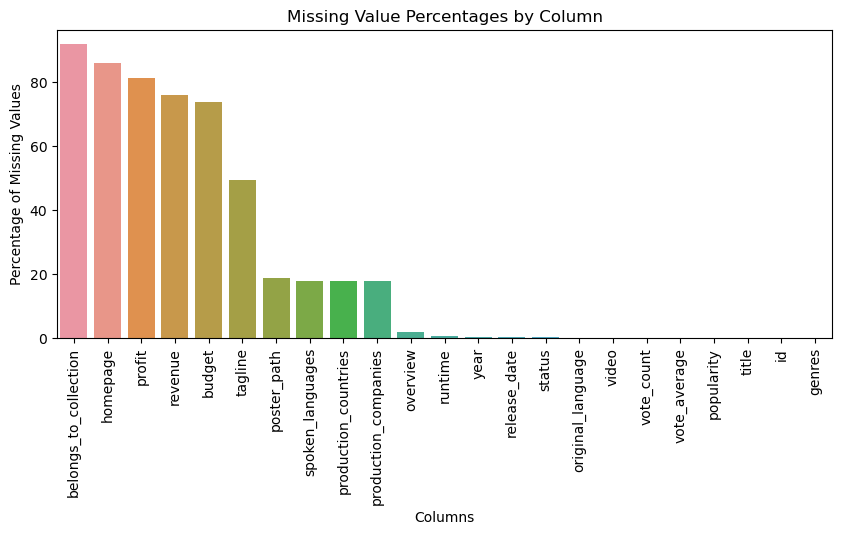

In [958]:
plt.figure(figsize=(10,4))
sns.barplot(x = nulos.index, y = nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.show()

In [968]:
# Ajustar la precisión de visualización a 2 decimales
# pd.set_option('display.float_format', '{:.2f}'.format)

missing_percentage = movies.isnull().mean() * 100

# Convertir a DataFrame
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Nulos']

missing_percentage

,Column,Nulos
0,title,0.01
1,overview,1.79
2,release_date,0.19
3,vote_average,0.01
4,vote_count,0.01
5,genres,0.00
6,id,0.00
7,original_language,0.02
8,popularity,0.01
9,budget,73.90


Se eliminan todas las peliculas que no puedan ser identificadas por un id:

In [930]:
movies[(movies['id'].isna())]

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,budget,...,tagline,video,belongs_to_collection,homepage,poster_path,production_companies,production_countries,spoken_languages,profit,year
4847,Munthiri Kaadu,In a Village Where they used to Honor Kill Lov...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [931]:
# Elimino pelicula con id na o nulo
movies = movies[(movies['id'].notna()) & (movies['id'] != 'ta') & (movies['id'] != '20/08/1997') & (movies['id'] != '29/09/2012') & (movies['id'] != '01/01/2014')]

In [932]:
# Convierte el id a entero
movies['id'] = movies['id'].astype('int')

# Exploratory Data Analysis (EDA)

#### Worldclouds: 
Estudiar la importancia de la presencia de ciertas palabras en los titulos y descripcion de la pelicula.

In [833]:
movies['title'] = movies['title'].astype('str')
words_title = ' '.join(movies['title'])

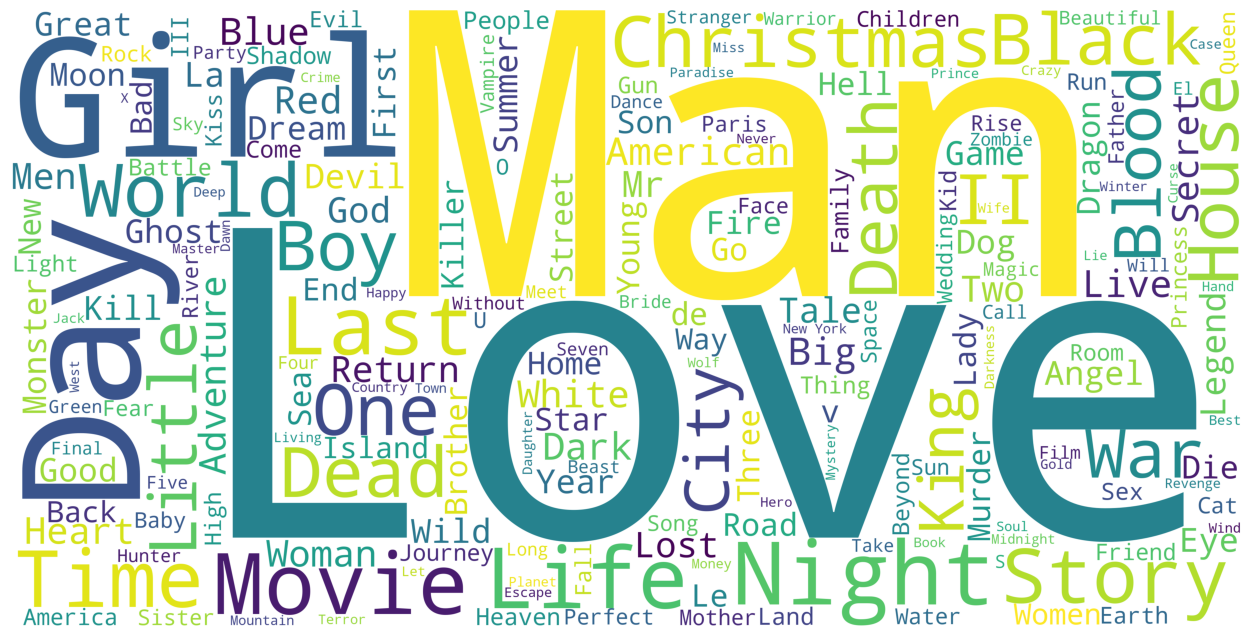

In [834]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_title)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

La palabra **Love** es la mas comun dentro de la eleccion de palabras para titulos. **Man**, **Day** y **Girl** tambien son palabras comunmente utilizadas. Esto encapsula bastante bien la idea de la presencia del romance en las películas.

In [835]:
movies['overview'] = movies['overview'].astype('str')
words_overview = ' '.join(movies['overview'])

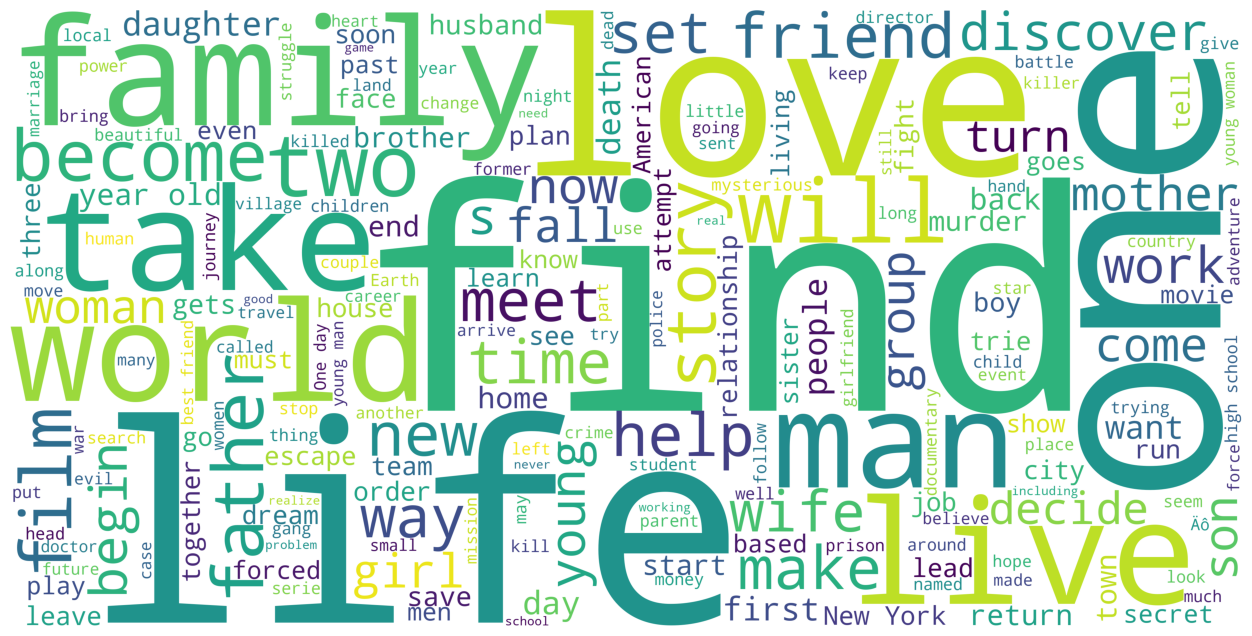

In [836]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Find**, **Life** y **One** son las palabras mas frecuentes dentro de las descripciones de las peliculas. **Love**, **Man** y **Girl** no solo estan presentes en los titulos, sino que se repiten en la descripcion.

#### Lenguaje y Paises:
Estudiar la presedencia de las peliculas.

In [837]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [838]:
country = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
country.name = 'countries'

In [839]:
countries = movies.drop('production_countries', axis=1).join(country)
countries = pd.DataFrame(countries['countries'].value_counts())
countries['country'] = countries.index
countries.columns = ['count', 'country']
countries = countries.reset_index().drop('index', axis=1)
countries.head(10)

,count,country
0,21150,United States of America
1,4091,United Kingdom
2,3936,France
3,2250,Germany
4,2168,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,827,India


La mayoria de las peliculas fueron producidas en **Estados Unidos** dado que la mayoria de las peliculas que comprenden el dataset son en ingles.

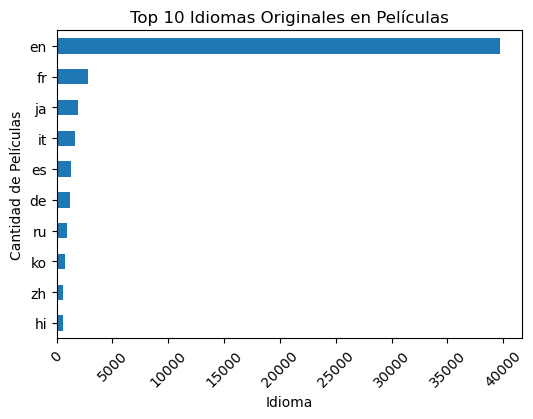

In [840]:
top_languages = movies['original_language'].value_counts().head(10)

# Invertir el orden para que el gráfico sea descendente
top_languages = top_languages.sort_values()

# Creando el gráfico de barras
plt.figure(figsize=(6, 4))
top_languages.plot(kind='barh')
plt.title('Top 10 Idiomas Originales en Películas')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

In [841]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_63694/3926210268.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [842]:
merged = world.set_index('name').join(countries.set_index('country'))

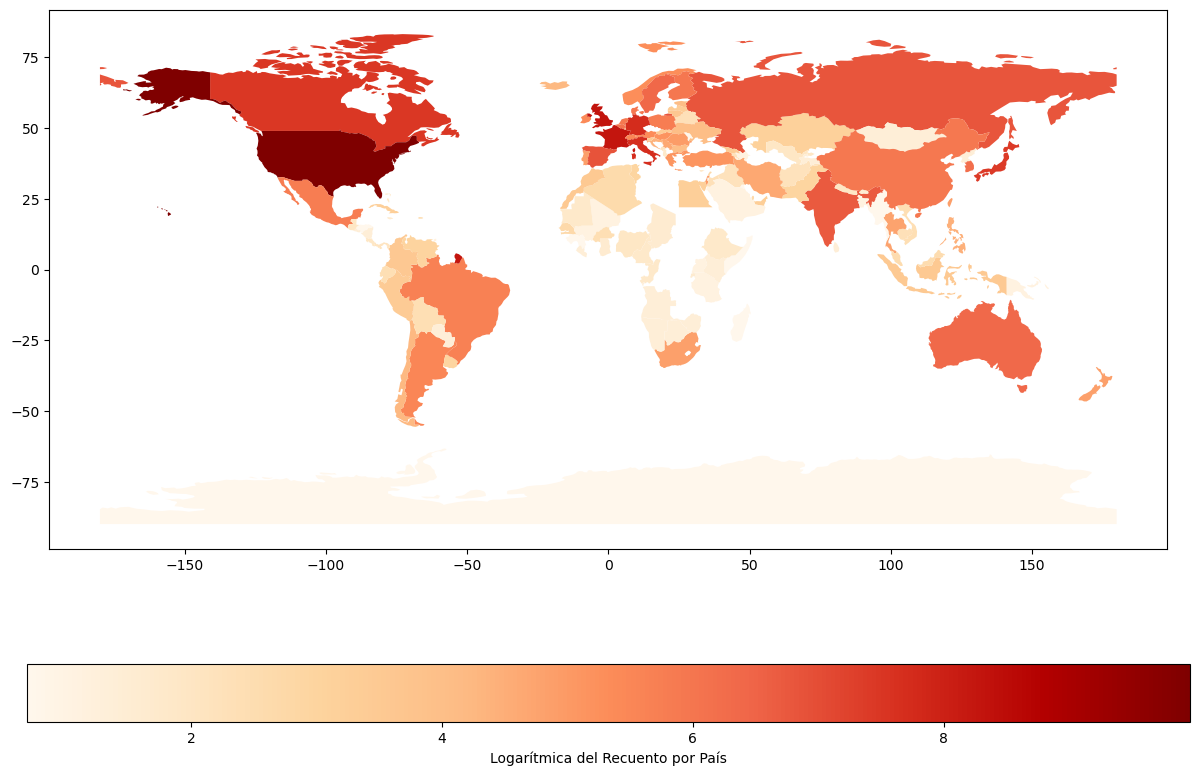

In [843]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Reemplazar valores de 'count' igual a 0 con un número muy pequeño para evitar problemas con el logaritmo
merged['count_log'] = np.log(merged['count'] + 1)

merged.plot(column='count_log', ax=ax, cmap='OrRd', legend=True,
            norm=plt.Normalize(vmin=merged['count_log'].min(), vmax=merged['count_log'].max()),
            legend_kwds={'label': "Logarítmica del Recuento por País",
                         'orientation': "horizontal"})
plt.show()

Se toma el logaritmo de la cantidad en el grafico para poder representar la informacion mejor dado el desbalance presentado por la presencia mayoritaria de peliculas estadounidenses. Ademas de **Estados Unidos**, **Europa** es un gran productor de peliculas.

#### Sagas:

In [844]:
import re
def extract_name(s):
    if isinstance(s, str):
        match = re.search(r"'name':\s*'([^']*)'", s)
        if match:
            return match.group(1)
    return None

In [845]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(extract_name)

In [846]:
# Almaceno los registros si las compañias productoras es una lista no vacía
saga = movies[movies['belongs_to_collection'].notna()]

In [847]:
saga = saga.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [848]:
# Suponiendo que tu DataFrame se llama df
# Ajusta el formato de los números flotantes para que no usen notación científica
pd.set_option('display.float_format', '{:.0f}'.format)

In [849]:
saga.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
536,Harry Potter Collection,8,963420928,7707367425
1121,Star Wars Collection,8,929311849,7434494790
629,James Bond Collection,26,273345009,7106970239
1271,The Fast and the Furious Collection,8,640637349,5125098793
937,Pirates of the Caribbean Collection,5,904315365,4521576826
1503,Transformers Collection,5,873220249,4366101244
313,Despicable Me Collection,4,922767554,3691070216
1444,The Twilight Collection,5,668421458,3342107290
594,Ice Age Collection,5,643341711,3216708553
649,Jurassic Park Collection,4,757871036,3031484143


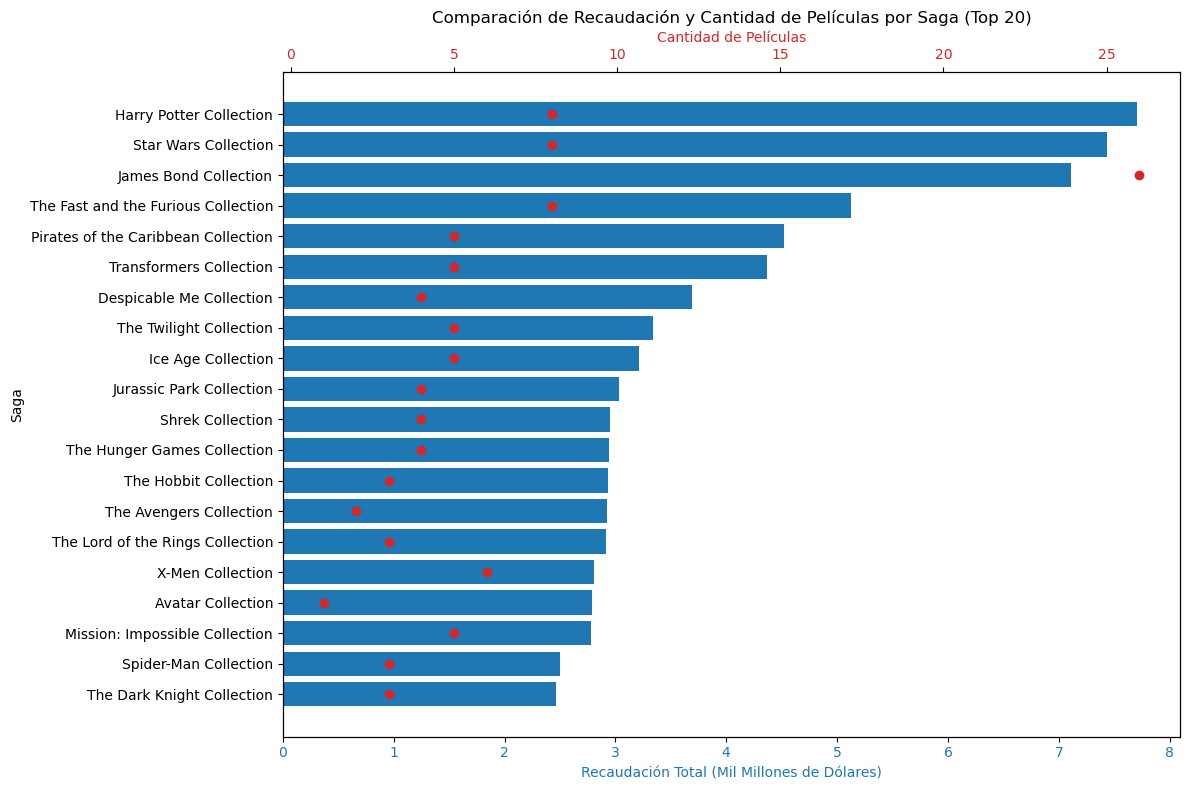

In [850]:
# Tomar las 20 franquicias principales
top_sagas = saga.sort_values(by='sum', ascending=False).head(20)
top_sagas = top_sagas.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Saga')
ax1.barh(top_sagas['belongs_to_collection'], top_sagas['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_sagas['count'], top_sagas['belongs_to_collection'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Saga (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

La saga de **Harry Potter** es la más exitosa en la industria cinematográfica, recaudando más de 7.707 mil millones de dólares con 8 películas. Las películas de **Star Wars** ocupan un cercano segundo lugar, con 7.403 mil millones de dólares también de 8 películas. **James Bond** está en tercer lugar, pero la saga tiene significativamente más películas en comparación con las demás en la lista y, por lo tanto, un promedio de recaudación mucho menor.

Segun la ganancia media de las sagas:

In [851]:
saga.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
110,Avatar Collection,1,2787965087,2787965087
1201,The Avengers Collection,2,1462480802,2924961604
466,Frozen Collection,1,1274219009,1274219009
433,Finding Nemo Collection,2,984453212,1968906425
1306,The Hobbit Collection,3,978507785,2935523356
1342,The Lord of the Rings Collection,3,972181581,2916544743
536,Harry Potter Collection,8,963420928,7707367425
1121,Star Wars Collection,8,929311849,7434494790
313,Despicable Me Collection,4,922767554,3691070216
937,Pirates of the Caribbean Collection,5,904315365,4521576826


La **Saga Avatar**, aunque actualmente solo consta de una película, es la franquicia más exitosa de todos los tiempos, con esa única película recaudando cerca de 3 mil millones de dólares. La **Saga de Harry Potter** sigue siendo la más exitosa con al menos 5 películas.

#### Companias Productoras:

In [852]:
movies['production_companies'] = movies['production_companies'].apply(extract_name)

In [853]:
# Almaceno los registros si las compañias productoras es una lista no vacía
companies = movies[movies['production_companies'].notna()]

In [854]:
companies = companies.pivot_table(index='production_companies', values='revenue', aggfunc={'revenue': ['sum', 'mean', 'count']}).reset_index()

In [855]:
companies.sort_values('sum', ascending=False).head(10)

,production_companies,count,mean,sum
7097,Paramount Pictures,391,119755650,46824459112
9776,Universal Pictures,401,114341451,45850921910
10046,Walt Disney Pictures,146,272474061,39781212886
2173,Columbia Pictures,235,135777854,31907795634
9640,Twentieth Century Fox Film Corporation,291,107157271,31182765770
6598,New Line Cinema,187,85904043,16064056110
9934,Village Roadshow Pictures,74,170437780,12612395710
10065,Warner Bros.,162,75765791,12274058211
2773,DreamWorks SKG,62,179908795,11154345261
5660,Lucasfilm,22,449928232,9898421106


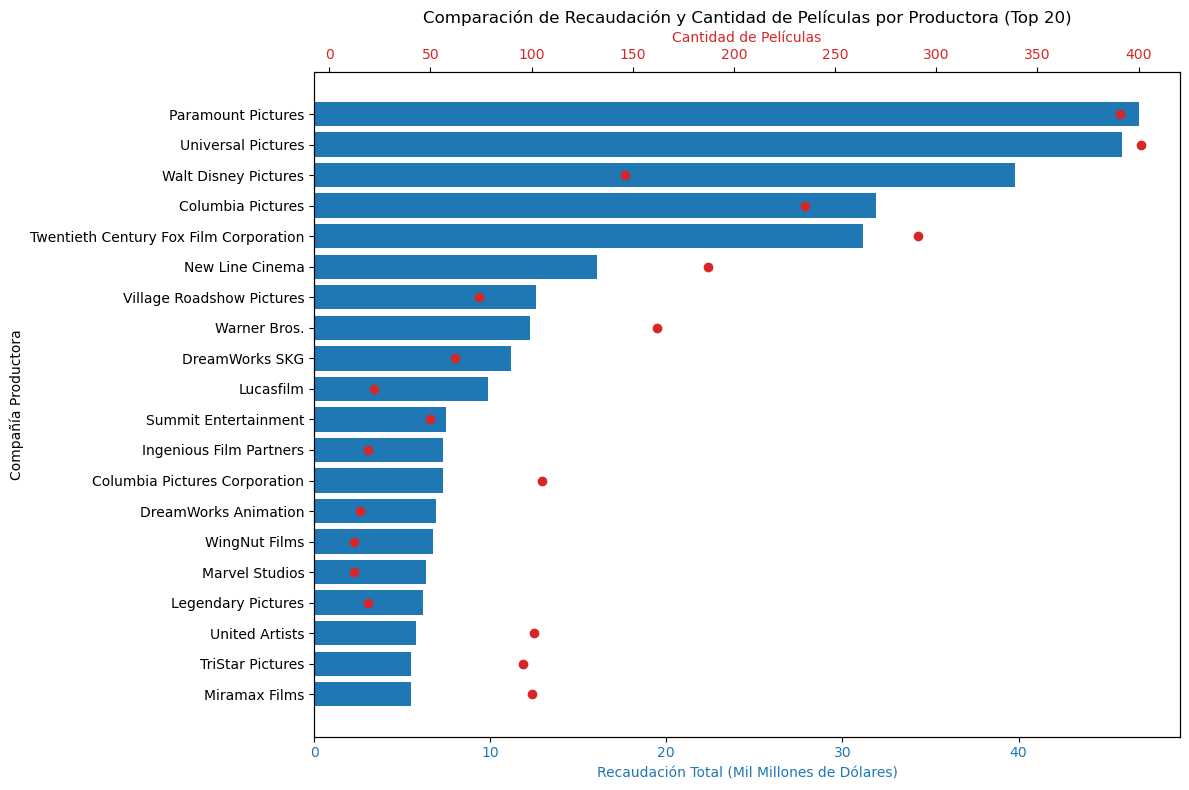

In [856]:
# Tomar las 20 franquicias principales
top_companies = companies.sort_values(by='sum', ascending=False).head(20)
top_companies = top_companies.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Compañía Productora')
ax1.barh(top_companies['production_companies'], top_companies['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_companies['count'], top_companies['production_companies'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Productora (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

**Paramount Pictures** y **Universal Pictures** se destacan como las productoras con el mayor número de películas, aunque no necesariamente es la que lidera en términos de recaudación por pelicula, lo que sugiere una estrategia de producción más enfocada en cantidad. Por otro lado, algunas productoras como **Walt Disney Pictures** y **Pixar Animation Studios**, presentan una menor cantidad de producciones pero con una recaudación total muy alta, indicando que sus películas tienden a ser éxitos que generan ingresos significativos.

#### Popularidad, Voto Promedio y Cantidad de Votos:
En esta sección, trabajaremos con las métricas proporcionadas por los usuarios de TMDB. Intentaremos obtener una comprensión más profunda de las características de popularidad, promedio de votos y conteo de votos e intentaremos deducir cualquier relación entre ellas, así como con otras características numéricas como el presupuesto y los ingresos.

In [857]:
# Convertir las columnas popularity, vote_count y vote_average a numéricas
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')

In [858]:
movies.describe()

,vote_average,vote_count,id,popularity,budget,revenue,profit,year
count,55324,55324,55327,55324,14442,13269,10263,55226
mean,6,383,143546,9,27431477,84827944,70444574,1995
std,2,1459,194986,30,40017622,168988330,157624415,24
min,0,0,2,0,1,1,-199545977,1874
25%,5,4,23393,1,3200000,4619014,-499780,1983
50%,6,15,62001,2,12000000,24941969,17556119,2003
75%,7,109,198258,9,35000000,88323487,76032370,2012
max,10,34767,1203973,2719,460000000,2923706026,2686706026,2027


<Axes: ylabel='Frequency'>

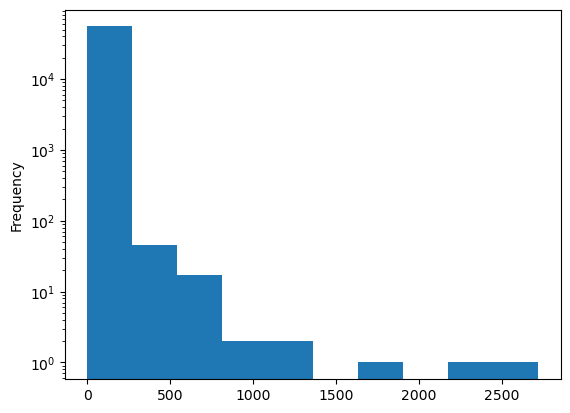

In [859]:
# Boxplot de la popularidad
# sns.distplot(movies['popularity'])
movies['popularity'].plot(logy=True, kind='hist')

La popularidad parece seguir una distribucion Lognormal, por lo que son muchos con baja popularidad y pocos que consiguen llegar a un valor alto. La media es 2.9, pero el maximo llega a 2719. De todas formas, como se ve en el grafico, todas las peliculas bajo el percentil 75 tienen un valor menor a 9.

La popularidad de las peliculas se mide segun (https://developer.themoviedb.org/docs/popularity-and-trending): 
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

In [860]:
movies[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
3,Oppenheimer,2719,2023
12,The Creator,2234,2023
1,Five Nights at Freddy's,1859,2023
0,Expend4bles,1294,2023
5,Mission: Impossible - Dead Reckoning Part One,1145,2023
2,Fast X,973,2023
8,The Equalizer 3,847,2023
15,The Hunger Games: The Ballad of Songbirds & Sn...,800,2023
4,Saw X,755,2023
10,The Marvels,713,2023


In [861]:
# Pelicula mas popular por año
popular_year = movies.sort_values('popularity', ascending=False).groupby('year').first().reset_index()

In [862]:
import plotly.express as px

# Crea un gráfico de barras interactivo con Plotly Express
fig = px.bar(
    popular_year,
    x='popularity',
    y='title',
    orientation='h',  # Gráfico de barras horizontal
    color='year',  # Colorea por año
    title='Película más popular por año'
)

# Configura los ejes y el título del gráfico
fig.update_layout(
    xaxis_title='Popularidad',
    yaxis_title='Título de la película',
    yaxis=dict(
        categoryorder='array', 
        categoryarray=popular_year.sort_values('year', ascending=False)['year'].unique()
    ),
    coloraxis_showscale=False  # Oculta la barra de color si no la necesitas
)

# Muestra el gráfico
fig.show()

<Axes: xlabel='vote_average'>

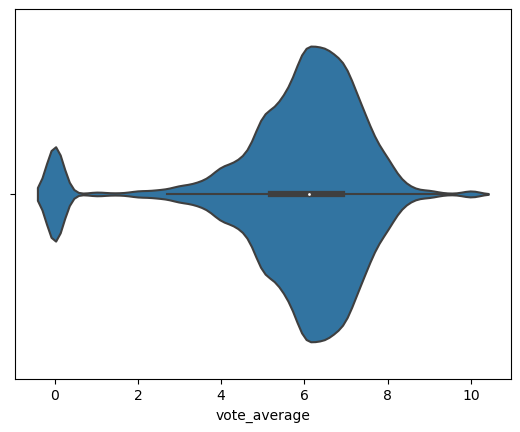

In [863]:
sns.violinplot(x=movies['vote_average'])

Parece que los votantes son bastante estrictos con sus notas, la media de los votos es de 6 de 10. Hay una gran elevacion en la distribucion en la puntuacion minima, pero esto puede ser producto de peliculas que no tuvieron evaluacion por votantes.

Para un analisis mas certero se tendran en cuenta unicamente los valores de votacion con mas de 5000 votos. Este criterio es empleado por IMDB's para seleccionar el top 250 peliculas.

<Axes: xlabel='vote_average'>

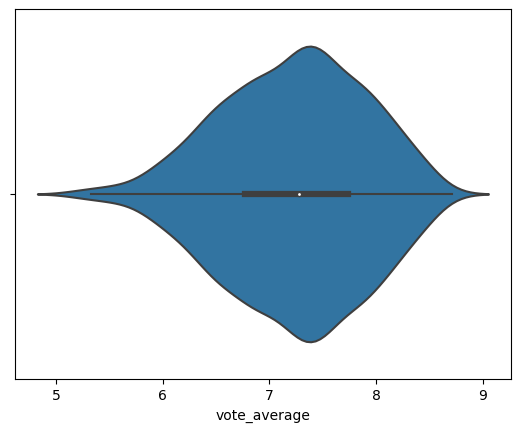

In [864]:
sns.violinplot(x=movies.loc[movies['vote_count'] > 5000,'vote_average'])

En este caso, se puede ver que la distribucion de los votos promedio varia entre 4 y 10. Por lo que los votantes son mas propensos a criticar positivamente las peliculas.

In [865]:
movies[movies['vote_count'] > 5000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
175,The Godfather,9,18968,1972
303,The Shawshank Redemption,9,24955,1994
474,The Godfather Part II,9,11453,1974
681,Schindler's List,9,14799,1993
1327,12 Angry Men,9,7797,1957
433,Parasite,9,16664,2019
238,The Dark Knight,9,30929,2008
476,The Green Mile,9,16145,1999
352,Your Name.,9,10505,2016
10713,The Godfather,8,6024,1972


**The Godfather** y **The Shawshank Redemption** son las dos películas más aclamadas por la crítica en la base de datos de TMDB. Tienen una calificación de  9 en TMDB.

#### Generos:
Distribucion de genero y exploracion de tendencias.

In [866]:
def get_names(column):
    # Aplica ast.literal_eval para interpretar las cadenas como listas de diccionarios
    column = column.apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else x)

    # Extrae los nombres de la lista de diccionarios
    column = column.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    return column

In [867]:
movies['genres'] = get_names(movies['genres'])

In [868]:
movies['genres'].head()

0    [Action, Adventure, Thriller]
1                [Horror, Mystery]
2        [Action, Crime, Thriller]
3                 [Drama, History]
4               [Horror, Thriller]
Name: genres, dtype: object

In [869]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genres = movies.drop('genres', axis=1).join(s)

In [870]:
genres_count = genres['genre'].value_counts()
genres_count = genres_count.reset_index()
genres_count.columns = ['Genre', 'Count']

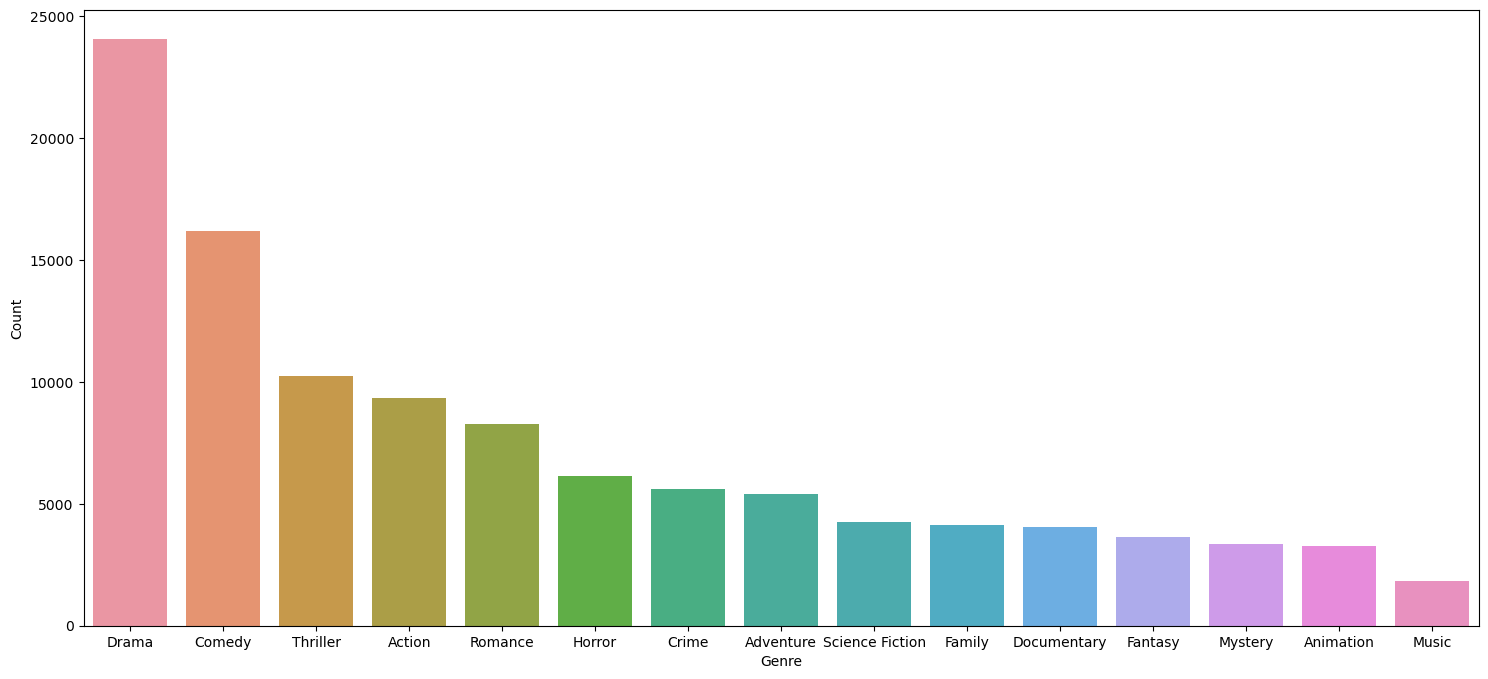

In [871]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Count', data=genres_count.head(15))
plt.show()

El **drama** es el género más común, con casi la mitad de las películas. La **comedia** llega en un distante segundo lugar, con un 25% de las películas. Otros géneros principales representados en el top 10 son **Acción, Terror, Crimen, Misterio, Ciencia Ficción, Animación y Fantasía**.

Para evaluar tendencias solo estaremos observando tendencias a partir del año 2000. Consideraremos solo aquellos temas que aparezcan en los 10 géneros más populares. 

In [872]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(10))) & (genres['year'] >= 2000) & (genres['year'] <= 2023)]

In [873]:
ctab = pd.crosstab(tendencia_genres['year'], tendencia_genres['genre'])
ctab = ctab.div(ctab.sum(axis=1), axis=0)

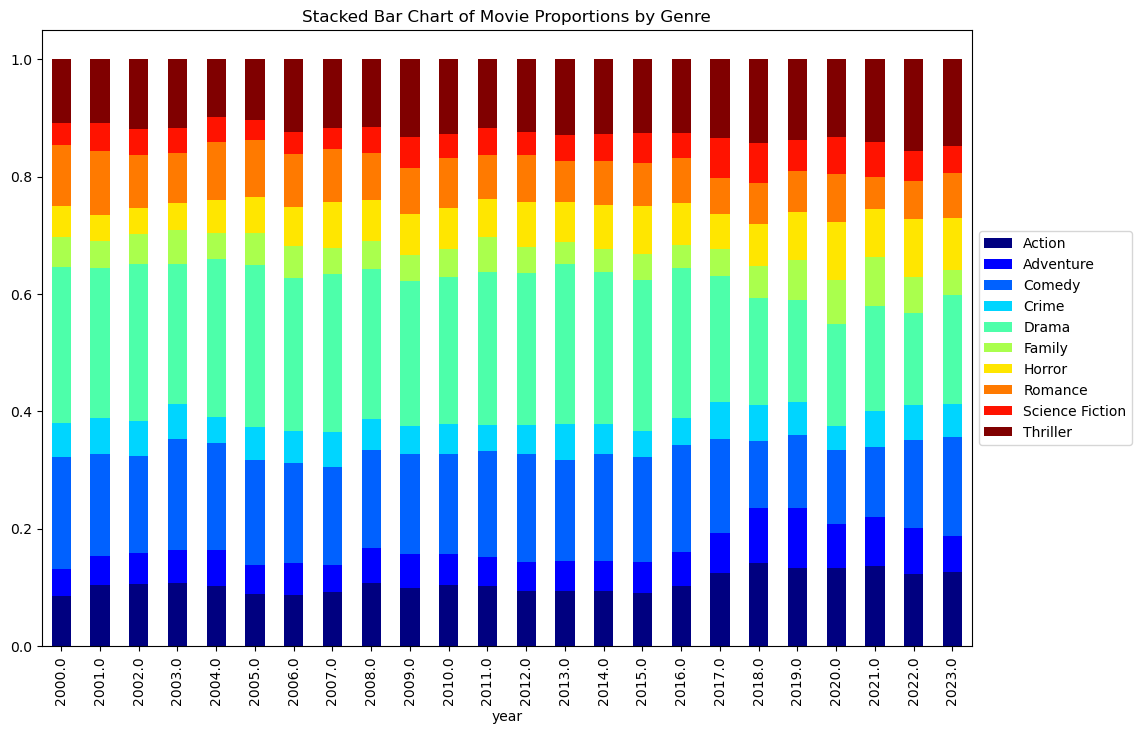

In [874]:
ctab.plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

La proporción de películas de cada género se ha mantenido bastante constante desde principios de este siglo, las mayores diferenciaciones se encuentran a partir del 2017. La proporción de películas **dramáticas** y **comedias** han caído. Las películas de **Thriller** y **Horror** han aumentado ligeramente.

<Figure size 800x2000 with 0 Axes>

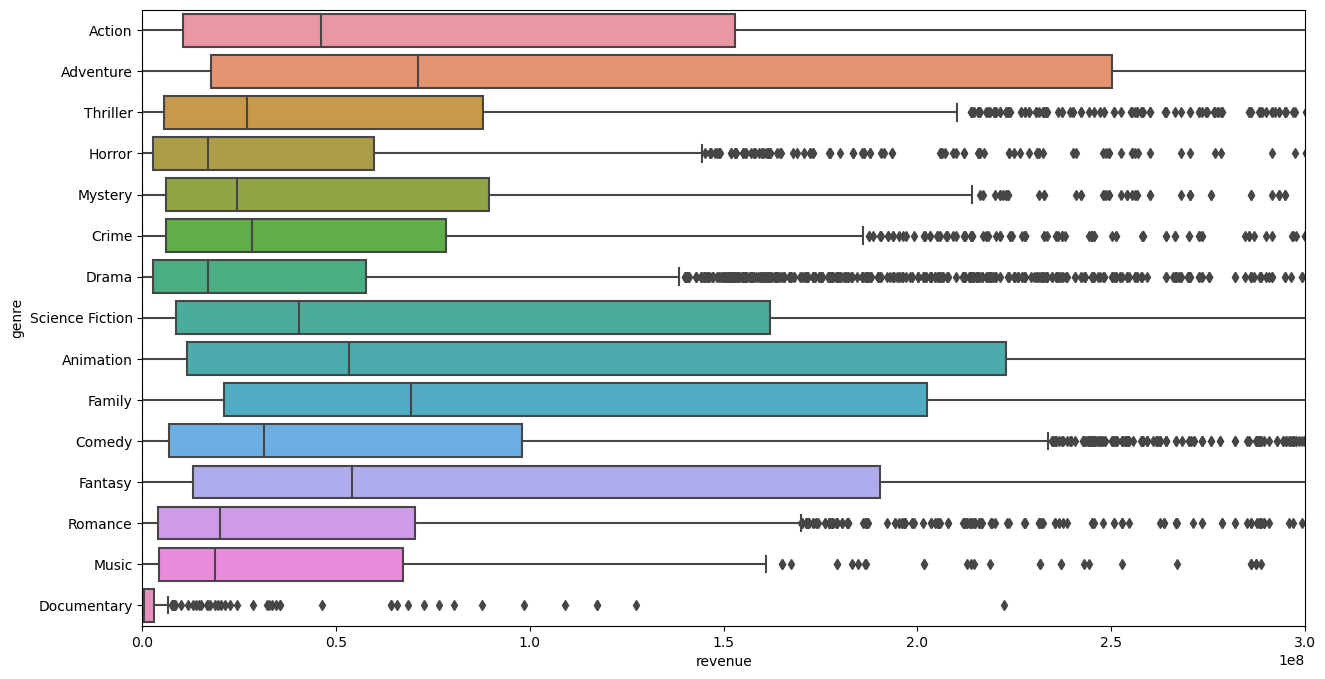

In [875]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(15)))]
plt.figure(figsize=(8,20))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(y=tendencia_genres["genre"], x=tendencia_genres["revenue"], ax =ax)
ax.set_xlim([0, 3e8])
plt.show()

Las películas de **Aventura**, **Animación** y **Familia** tienen el rango intercuartíl más amplio, así como la mediana de ingresos más alta entre todos los géneros representados. **Fantasía**, **Ciencia Ficción** tienen ingresos medianos similares aunque no son tan frecuentes como se analizo anteriormente.

#### Cast y Crew

In [877]:
credits_df = pd.read_csv('input/credits.csv')
credits_df.head()

,id,cast,crew
0,299054,"[{'cast_id': 976, 'name': 'Jason Statham', 'ch...","[{'crew_id': 966, 'name': 'Tim Maurice-Jones',..."
1,609681,"[{'cast_id': 60073, 'name': 'Brie Larson', 'ch...","[{'crew_id': 7232, 'name': 'Sarah Halley Finn'..."
2,670292,"[{'cast_id': 1117313, 'name': 'John David Wash...","[{'crew_id': 947, 'name': 'Hans Zimmer', 'depa..."
3,385687,"[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de..."
4,951491,"[{'cast_id': 2144, 'name': 'Tobin Bell', 'char...","[{'crew_id': 2127, 'name': 'James Wan', 'depar..."


In [878]:
# Merge movies and credits DataFrames
movies = movies.merge(credits_df, on='id')

In [886]:
def get_director(column):
    # Primero, asegúrate de que los datos están en formato de lista de diccionarios
    column = column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Ahora itera sobre la lista y encuentra el director
    director = column.apply(lambda crew: next((i['name'] for i in crew if i['department'] == 'Directing'), np.nan))

    return director

In [887]:
movies['director'] = get_director(movies['crew'])

In [888]:
movies['cast'] = get_names(movies['cast'])
movies['crew'] = get_names(movies['crew'])

In [889]:
movies['cast_size'] = movies['cast'].apply(lambda x: len(x))
movies['crew_size'] = movies['crew'].apply(lambda x: len(x))

In [891]:
s = movies.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actors = movies.drop('cast', axis=1).join(s)

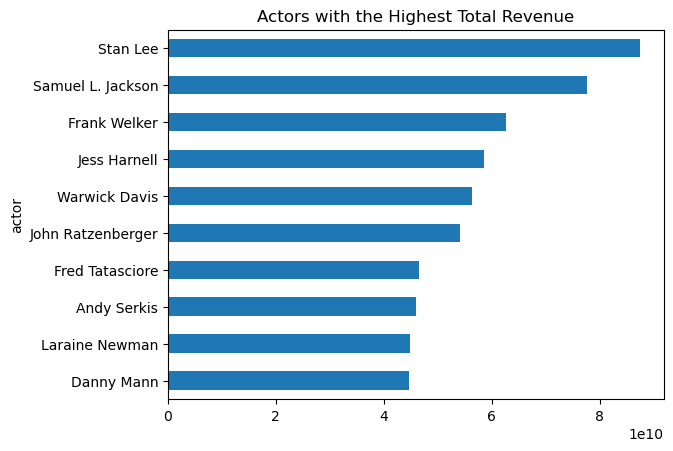

In [896]:
plt.title('Actors with the Highest Total Revenue')
actors.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

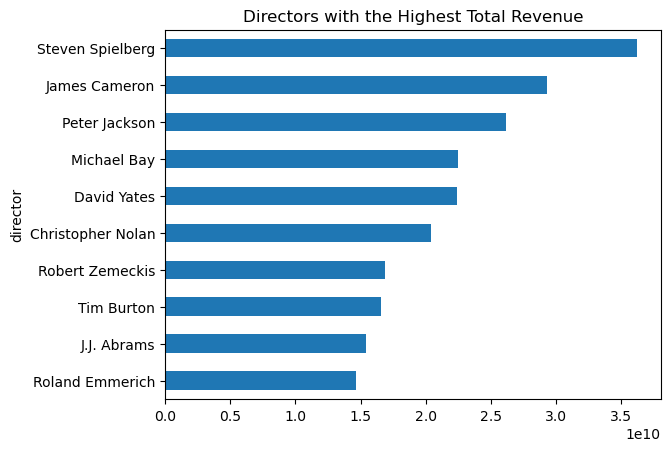

In [899]:
plt.title('Directors with the Highest Total Revenue')
movies.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

# Sistema de Recomendación

### Content Based Recommender:

### Memory Based Recommender (Filtros Colaborativos):

### Hybrid Recommender:

# Deploy: